# Neural Network - Street View House Numbers

The Real Problem

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles,
orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

The Street View House Numbers (SVHN) Dataset
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Link to the dataset:
https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing (Links to an external site.)Links to an external site.

Acknowledgement for the datasets.
Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary 

The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows: 

Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages) 
Data fetching and understand the train/val/test splits. (5 points)
Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (10 points) 
Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (10 points) 
Implement batch normalization for training the neural network (5 points) 
Print the classification accuracy metrics (5 points) 


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

TensorFlow 2.x selected.


In [3]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


###### Data fetching and understand the train/val/test splits.

Reading h5 file which was given in extranal link. 

In [4]:
#filename = 'SVHN_single_grey1.h5'
filename = '/gdrive/My Drive/Colab Notebooks/SVHN_single_grey1.h5'

with h5py.File(filename, 'r') as f:
    # List all groups
    print("Keys: %s" % f.keys())
    
    # Get the data
    #get X_test 
    a_group_key = list(f.keys())[0]
    X_test = np.array(f[a_group_key])
    #get X_train 
    a_group_key = list(f.keys())[1]
    X_train = np.array(f[a_group_key])
    #get X_val 
    a_group_key = list(f.keys())[2]
    X_val = np.array(f[a_group_key])
    #get y_test 
    a_group_key = list(f.keys())[3]
    y_test = np.array(f[a_group_key])
    #get y_train 
    a_group_key = list(f.keys())[4]
    y_train = np.array(f[a_group_key])
    #get X_test 
    a_group_key = list(f.keys())[5]
    y_val = np.array(f[a_group_key])
    
    

Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


We can see here that data has 6 keys which are 'X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val' respectively.

In [5]:
X_test[0]

array([[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904, 112.1646],
       [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475, 109.9368],
       [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414, 109.1048],
       ...,
       [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074, 112.7346],
       [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 , 114.3431],
       [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017, 114.1906]],
      dtype=float32)

In [6]:
X_test.shape

(18000, 32, 32)

In [7]:
y_test[0]

1

In [8]:
y_test.shape

(18000,)

In [9]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [10]:
X_train.shape

(42000, 32, 32)

In [11]:
y_train[0]

2

In [12]:
y_train.shape

(42000,)

In [13]:
X_val[0]

array([[ 44.299 ,  45.9999,  51.3306, ...,  25.2764,  27.515 ,  27.156 ],
       [ 49.1351,  60.3081,  70.1222, ...,  23.7002,  25.2378,  24.2918],
       [ 60.7595,  83.7141, 102.1961, ...,  24.5044,  24.9712,  22.8512],
       ...,
       [ 67.1072,  93.2464, 109.2017, ...,  26.6444,  24.6015,  22.9607],
       [ 24.7569,  36.6417,  48.9071, ...,  21.9268,  21.5309,  21.5479],
       [ 22.6584,  22.7724,  27.2666, ...,  21.443 ,  20.8191,  20.0812]],
      dtype=float32)

In [14]:
X_val.shape

(60000, 32, 32)

In [15]:
y_val[0]

0

In [16]:
y_val.shape

(60000,)

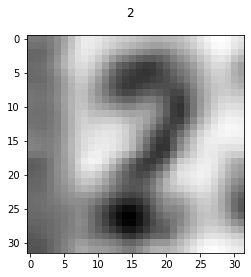

In [17]:
#Lets print the image as well
img_num = np.random.randint(0,X_test.shape[0])
plt.imshow(X_test[img_num],cmap='gray')
plt.suptitle(str(y_test[img_num]))
plt.show()

Verify if existing classes/labels are correct or not.

In [0]:
class_names = np.arange(0,10)

In [19]:
class_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

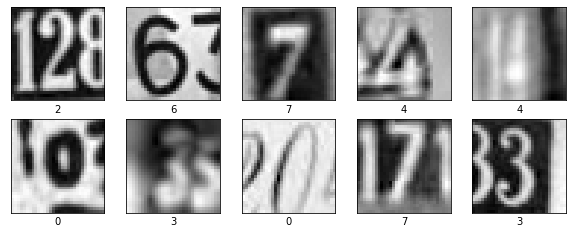

In [20]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

###### Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)

Before we apply Deep Neural Network, we need to appy one hot encoder for labels.

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)
valY = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [22]:
trainY[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
testY[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
valY[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)


Starting with single layer feedforward network (which is same as logistic regression):

In [25]:
# Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Add Dense Layer which provides 10 Output for 10 labels using softmax where total should be 1 or 100% 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

#Execute the model
model.fit(X_train, trainY, validation_data=(X_val, valY), epochs=5, batch_size=32)  

Train on 42000 samples, validate on 60000 samples
Epoch 1/5
42000/42000 [==============================] - 5s 111us/sample - loss: 52231.7534 - accuracy: 0.1049 - val_loss: 48914.9215 - val_accuracy: 0.1030
Epoch 2/5
42000/42000 [==============================] - 4s 97us/sample - loss: 49010.8839 - accuracy: 0.1065 - val_loss: 47237.8406 - val_accuracy: 0.1150
Epoch 3/5
42000/42000 [==============================] - 4s 98us/sample - loss: 46629.3195 - accuracy: 0.1098 - val_loss: 45275.2245 - val_accuracy: 0.1221
Epoch 4/5
42000/42000 [==============================] - 4s 97us/sample - loss: 46796.8485 - accuracy: 0.1109 - val_loss: 45183.3696 - val_accuracy: 0.1096
Epoch 5/5
42000/42000 [==============================] - 4s 95us/sample - loss: 46208.8997 - accuracy: 0.1121 - val_loss: 39617.4489 - val_accuracy: 0.1073


We can see here that accuracy is very low since it is plain logistic regression without any hidden layer. Lets add more hidden layers to improve the accuracy. 

In [26]:
# Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(300, activation = 'relu'))

# Add Dense Layer which provides 10 Output for 10 labels using softmax where total should be 1 or 100% 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

#Execute the model
model.fit(X_train, trainY, validation_data=(X_val, valY), epochs=5, batch_size=32)  

Train on 42000 samples, validate on 60000 samples
Epoch 1/5
42000/42000 [==============================] - 8s 198us/sample - loss: 1033.4722 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
42000/42000 [==============================] - 8s 194us/sample - loss: 2.3026 - accuracy: 0.1020 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
42000/42000 [==============================] - 8s 191us/sample - loss: 2.3027 - accuracy: 0.1015 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
42000/42000 [==============================] - 8s 192us/sample - loss: 2.3027 - accuracy: 0.1013 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
42000/42000 [==============================] - 8s 192us/sample - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.1000


We see that accuracy is not changing within epocs, which is showing gradient vanishing problem. To overcome this problem where change in loss is not changing with respect to change in weight. Hence we need to make high jump to reduce the loss. 
Hence we will use Stochastic gradient descent with momentum. We will add few more layers as well. 

Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

In [27]:
# Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(500))
model.add(tf.keras.layers.LeakyReLU())

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(300))
model.add(tf.keras.layers.LeakyReLU())

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.LeakyReLU())

# Add Dense Layer which provides 10 Output for 10 labels using softmax where total should be 1 or 100% 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
sgd_optim = tf.keras.optimizers.SGD(lr=.01, decay=0.001,momentum=0.9)
model.compile(optimizer=sgd_optim, loss='categorical_crossentropy', metrics=['accuracy'])

#Execute the model
model.fit(X_train, trainY, validation_data=(X_val, valY), epochs=5, batch_size=32)  

Train on 42000 samples, validate on 60000 samples
Epoch 1/5
42000/42000 [==============================] - 16s 385us/sample - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/5
42000/42000 [==============================] - 17s 398us/sample - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/5
42000/42000 [==============================] - 16s 374us/sample - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/5
42000/42000 [==============================] - 16s 375us/sample - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/5
42000/42000 [==============================] - 16s 372us/sample - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000


Lets try nestrov momentum with SGD since we see loss as nan. Also add batch Normalization to regularize it

- Implementing batch normalization for training the neural network

In [28]:
# Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(500))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(300))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Output for 10 labels using softmax where total should be 1 or 100% 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
sgd_optim = tf.keras.optimizers.SGD(lr=.01, decay=0.001,momentum=0.9, nesterov=True)
model.compile(optimizer=sgd_optim, loss='categorical_crossentropy', metrics=['accuracy'])

#Execute the model
model.fit(X_train, trainY, validation_data=(X_val, valY), epochs=5, batch_size=32)  

Train on 42000 samples, validate on 60000 samples
Epoch 1/5
42000/42000 [==============================] - 23s 548us/sample - loss: 1.3626 - accuracy: 0.5514 - val_loss: 0.8645 - val_accuracy: 0.7336
Epoch 2/5
42000/42000 [==============================] - 22s 513us/sample - loss: 0.9543 - accuracy: 0.6956 - val_loss: 0.7122 - val_accuracy: 0.7864
Epoch 3/5
42000/42000 [==============================] - 22s 513us/sample - loss: 0.8200 - accuracy: 0.7417 - val_loss: 0.6353 - val_accuracy: 0.8111
Epoch 4/5
42000/42000 [==============================] - 22s 513us/sample - loss: 0.7548 - accuracy: 0.7628 - val_loss: 0.5692 - val_accuracy: 0.8303
Epoch 5/5
42000/42000 [==============================] - 22s 522us/sample - loss: 0.7084 - accuracy: 0.7775 - val_loss: 0.5322 - val_accuracy: 0.8443


Trying to see if Nesterov really made any difference:

In [29]:
# Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(500))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(300))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Output for 10 labels using softmax where total should be 1 or 100% 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
sgd_optim = tf.keras.optimizers.SGD(lr=.01, decay=0.001,momentum=0.9)
model.compile(optimizer=sgd_optim, loss='categorical_crossentropy', metrics=['accuracy'])

#Execute the model
model.fit(X_train, trainY, validation_data=(X_val, valY), epochs=5, batch_size=32)  

Train on 42000 samples, validate on 60000 samples
Epoch 1/5
42000/42000 [==============================] - 23s 542us/sample - loss: 1.3795 - accuracy: 0.5508 - val_loss: 0.8779 - val_accuracy: 0.7279
Epoch 2/5
42000/42000 [==============================] - 22s 514us/sample - loss: 0.9602 - accuracy: 0.6960 - val_loss: 0.7205 - val_accuracy: 0.7839
Epoch 3/5
42000/42000 [==============================] - 21s 508us/sample - loss: 0.8384 - accuracy: 0.7355 - val_loss: 0.6333 - val_accuracy: 0.8127
Epoch 4/5
42000/42000 [==============================] - 22s 515us/sample - loss: 0.7687 - accuracy: 0.7562 - val_loss: 0.5752 - val_accuracy: 0.8322
Epoch 5/5
42000/42000 [==============================] - 21s 510us/sample - loss: 0.7159 - accuracy: 0.7776 - val_loss: 0.5525 - val_accuracy: 0.8377


We see here that without nestrov is giving little better result in this case. Now lets try to see if ADAM optimzer can improve the performance. 

In [30]:
# Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(500))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(300))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Output for 10 labels using softmax where total should be 1 or 100% 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Execute the model
model.fit(X_train, trainY, validation_data=(X_val, valY), epochs=5, batch_size=32)  

Train on 42000 samples, validate on 60000 samples
Epoch 1/5
42000/42000 [==============================] - 23s 553us/sample - loss: 1.4024 - accuracy: 0.5428 - val_loss: 0.9707 - val_accuracy: 0.7008
Epoch 2/5
42000/42000 [==============================] - 23s 546us/sample - loss: 1.0266 - accuracy: 0.6755 - val_loss: 0.8137 - val_accuracy: 0.7519
Epoch 3/5
42000/42000 [==============================] - 22s 532us/sample - loss: 0.9114 - accuracy: 0.7160 - val_loss: 0.6907 - val_accuracy: 0.7945
Epoch 4/5
42000/42000 [==============================] - 22s 526us/sample - loss: 0.8265 - accuracy: 0.7408 - val_loss: 0.6316 - val_accuracy: 0.8118
Epoch 5/5
42000/42000 [==============================] - 22s 533us/sample - loss: 0.7719 - accuracy: 0.7582 - val_loss: 0.6042 - val_accuracy: 0.8189


We see that adam is not increasing the performance here. Hence will go with SGD with momentum only as final model. We will tune the model a bit. 

In [31]:
# Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(600))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(400))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(300))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 5th hidden layer
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Output for 10 labels using softmax where total should be 1 or 100% 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
sgd_optim = tf.keras.optimizers.SGD(lr=.01, decay=0.001,momentum=0.9)
model.compile(optimizer=sgd_optim, loss='categorical_crossentropy', metrics=['accuracy'])

#Execute the model
model.fit(X_train, trainY, validation_data=(X_val, valY), epochs=5, batch_size=32)  

Train on 42000 samples, validate on 60000 samples
Epoch 1/5
42000/42000 [==============================] - 29s 685us/sample - loss: 1.3555 - accuracy: 0.5541 - val_loss: 0.8763 - val_accuracy: 0.7295
Epoch 2/5
42000/42000 [==============================] - 28s 657us/sample - loss: 0.9736 - accuracy: 0.6895 - val_loss: 0.7356 - val_accuracy: 0.7735
Epoch 3/5
42000/42000 [==============================] - 28s 659us/sample - loss: 0.8458 - accuracy: 0.7327 - val_loss: 0.6141 - val_accuracy: 0.8159
Epoch 4/5
42000/42000 [==============================] - 28s 664us/sample - loss: 0.7584 - accuracy: 0.7602 - val_loss: 0.5512 - val_accuracy: 0.8359
Epoch 5/5
42000/42000 [==============================] - 27s 651us/sample - loss: 0.7101 - accuracy: 0.7760 - val_loss: 0.5269 - val_accuracy: 0.8427


In [32]:
predicted= model.predict(X_test)
predicted

array([[7.39690483e-01, 3.98862176e-02, 1.61295719e-02, ...,
        3.76190362e-03, 3.92824821e-02, 2.75222566e-02],
       [2.96647286e-05, 1.10809261e-03, 3.09443206e-01, ...,
        6.82837903e-01, 3.49644455e-04, 1.59532239e-03],
       [1.20344863e-04, 4.13473696e-04, 9.97360170e-01, ...,
        1.01708945e-04, 1.18086487e-03, 1.17733784e-04],
       ...,
       [9.62008053e-05, 6.18727086e-03, 3.54814751e-04, ...,
        9.92484987e-01, 9.38718149e-05, 1.70189800e-04],
       [8.24757945e-03, 7.00598059e-04, 3.12571600e-03, ...,
        6.79489551e-03, 1.78285241e-02, 8.87265921e-01],
       [5.93277364e-05, 3.37203126e-03, 9.62767661e-01, ...,
        1.10879205e-02, 3.35223670e-03, 2.15350577e-04]], dtype=float32)

In [33]:
  score = model.evaluate(X_test,testY)
  score

18000/18000 [==============================] - 3s 145us/sample - loss: 0.6019 - accuracy: 0.8213


[0.6019437178505792, 0.8212778]

In [34]:
model.metrics_names

['loss', 'accuracy']

Decoding the predicted test result from multi class to one class to get the classification report or confusion matrix

In [0]:
def decode(data):
  decoded_value =  (np.argmax(data))
  return decoded_value

In [50]:
predicted.shape

(18000, 10)

In [0]:
predicted_output = []
for i in range(predicted.shape[0]):
  predicted_output.append(decode(predicted[i])) 


In [49]:
np.array(predicted_output).shape

(18000,)

In [51]:
y_test.shape

(18000,)

In [0]:
y_predicted = np.array(predicted_output)

In [53]:
print(y_test)

[1 7 2 ... 7 9 2]


In [54]:
print(y_predicted)

[0 7 2 ... 7 9 2]


 Print the classification accuracy metrics

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [57]:
confusion_matrix(y_test,y_predicted)

array([[1570,   39,   12,   18,   35,   12,   34,   24,   21,   49],
       [  29, 1568,   15,   37,   49,   19,   20,   51,   18,   22],
       [  27,   45, 1457,   38,   34,   23,    7,  103,   26,   43],
       [  23,   59,   45, 1264,   27,  174,   24,   35,   38,   30],
       [  23,   49,   25,   20, 1553,   18,   48,   13,   27,   36],
       [  19,   30,   12,   88,   17, 1438,   70,   17,   41,   36],
       [  46,   34,   14,   12,   53,   71, 1508,   17,   61,   16],
       [  14,   70,   42,   24,   22,   15,   11, 1572,    7,   31],
       [  34,   42,   28,   55,   26,   49,  109,   14, 1404,   51],
       [  81,   38,   25,   42,   25,   53,   16,   26,   49, 1449]])

<Figure size 432x288 with 0 Axes>

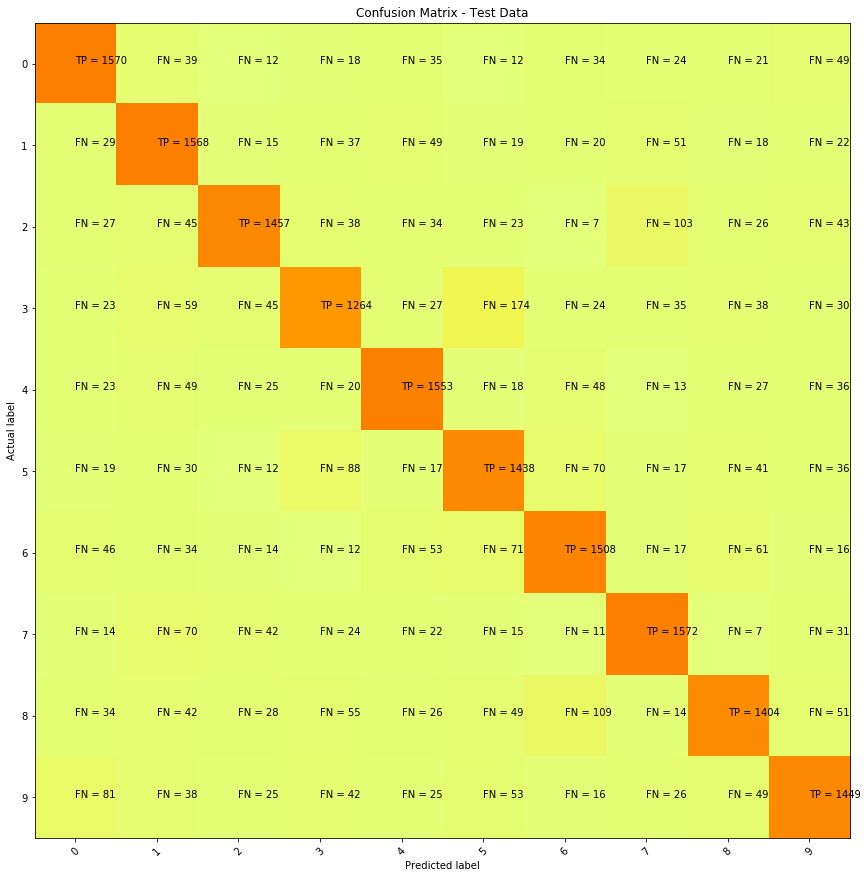

In [68]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_predicted)
plt.clf()
plt.figure(figsize=(15,15))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1','2','3','4','5','6','7','8','9']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TP','FN','FN','FN','FN','FN','FN','FN','FN','FN'], 
     ['FN','TP','FN','FN','FN','FN','FN','FN','FN','FN'],
     ['FN','FN','TP','FN','FN','FN','FN','FN','FN','FN'],
     ['FN','FN','FN','TP','FN','FN','FN','FN','FN','FN'],
     ['FN','FN','FN','FN','TP','FN','FN','FN','FN','FN'],
     ['FN','FN','FN','FN','FN','TP','FN','FN','FN','FN'],
     ['FN','FN','FN','FN','FN','FN','TP','FN','FN','FN'],
     ['FN','FN','FN','FN','FN','FN','FN','TP','FN','FN'],
     ['FN','FN','FN','FN','FN','FN','FN','FN','TP','FN'],
     ['FN','FN','FN','FN','FN','FN','FN','FN','FN','TP']]

 
for i in range(len(classNames)):
    for j in range(len(classNames)):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [70]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1814
           1       0.79      0.86      0.82      1828
           2       0.87      0.81      0.84      1803
           3       0.79      0.74      0.76      1719
           4       0.84      0.86      0.85      1812
           5       0.77      0.81      0.79      1768
           6       0.82      0.82      0.82      1832
           7       0.84      0.87      0.85      1808
           8       0.83      0.77      0.80      1812
           9       0.82      0.80      0.81      1804

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



We can conclude by this metrics or report that F1 value is pretty much same for all numbers. 3 has lowest F1 score means there are high chances og getting wrong predicted for number 3 as it has high resembles from number 8.